In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys

In [2]:
sys.path.insert(0, "..")

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
sandp = pd.read_excel("../../hmm-resources/datasets/sandp500.xlsx", skiprows=(0,1), names=["date", "closing"], parse_dates=[0]).set_index("date")

In [6]:
sandp.head(10)

closing
date               
1980-06-24   115.14
1980-06-25   116.72
1980-06-26   116.19
1980-06-27   116.00
1980-06-30   114.24
1980-07-01   114.93
1980-07-02   115.68
1980-07-03   117.46
1980-07-04   117.46
1980-07-07   118.29

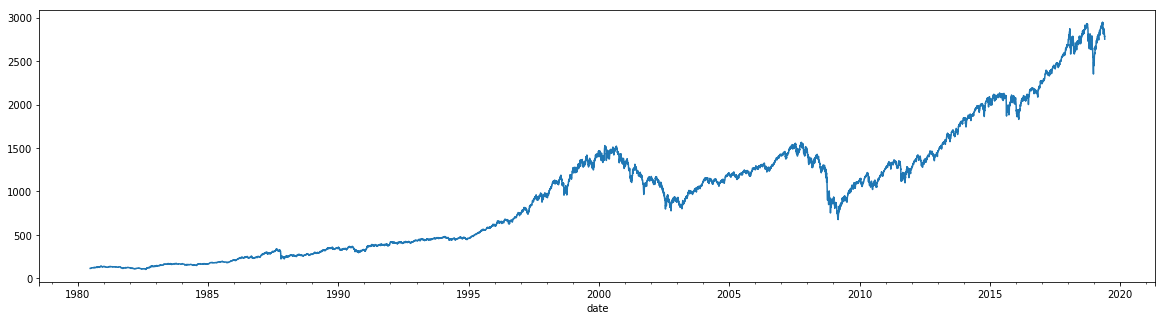

In [7]:
sandp.closing.plot(figsize=(20, 5))

In [8]:
logs = 100 *np.log(sandp.closing / sandp.closing.shift())[1:]

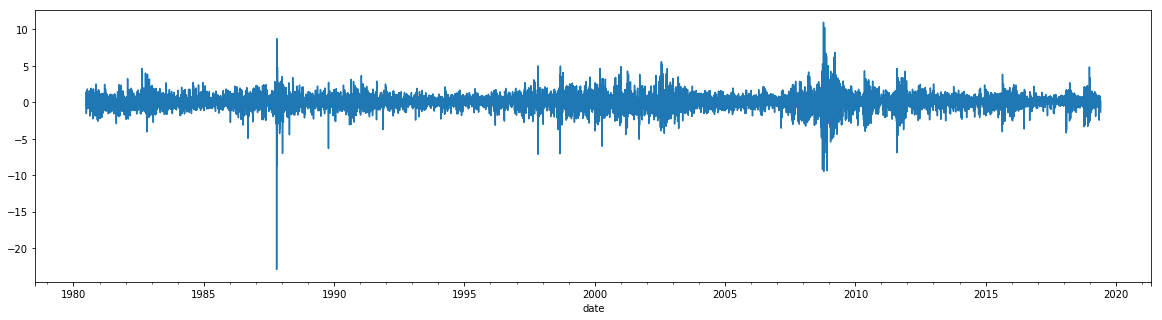

In [9]:
logs.plot(figsize=(20, 5))

/home/matthew/pkgsrc/install.20190210/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


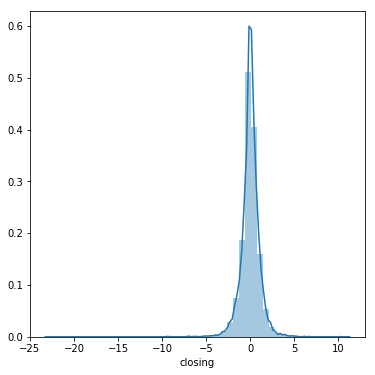

In [10]:
f, ax = plt.subplots(figsize=(6,6))
sns.distplot(logs, ax=ax)

In [11]:
logs.describe()

count    10158.000000
mean         0.031246
std          1.084924
min        -22.899723
25%         -0.420702
50%          0.022661
75%          0.535249
max         10.957196
Name: closing, dtype: float64

In [12]:
logs.kurtosis()

27.782413613239378

In [13]:
logs.skew()

-1.1681041167578912

In [14]:
from hmm import GaussianVariationalHMM, plots, GaussianHMM, GaussianVariationalMHMM, GaussianMHMM

In [15]:
logs2d = logs.values[None, :]

In [16]:
model = GaussianVariationalHMM.GaussianVariationalHMM(
    n_components=2,
    n_iterations=1000,
    n_inits=8, 
    tol=1e-6
)

In [17]:
model.fit(logs2d)

GaussianVariationalHMM(A_prior=None, implementation='scaling',
            means_prior='uninformed', min_a_value=None, n_components=2,
            n_inits=8, n_iterations=1000, n_jobs=-1, pi_prior=None,
            random_state=None, tol=1e-06, variances_prior='uninformed',
            verbose=0)

In [18]:
for e in model.explored_free_energies_:
    print(e[:3], e[-1])

[-23325830.963142574, -6120.27649188129, -5255.970919929262] -4184.376175474138
[-23382990.749177687, -6125.6448418281525, -5258.820098289491] -4184.376175456746
[-23351267.206644587, -6122.733313751651, -5257.017555077256] -4184.376175458379
[-23362175.68934413, -6125.131507130195, -5258.318364434363] -4184.376175453204
[-23332635.622749604, -6119.903078247153, -5255.73152281144] -4184.376175475808
[-23799280.642519988, -6240.402494235109, -5340.515609038589] -4184.3761755408495
[-23328492.59761609, -6120.615098054073, -5255.934886821873] -4184.37617546888
[-23338360.610724576, -6122.243236408837, -5256.76461473366] -4184.376175462904


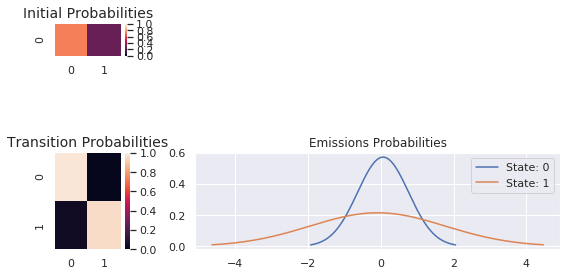

In [19]:
_ = plots.gaussian_hinton_diagram(
model.pi_normalized_,
model.A_normalized_,
model.means_posterior_,
model.variances_posterior_,
vmin=0,
vmax=1)

In [20]:
states = model.transform(logs2d)

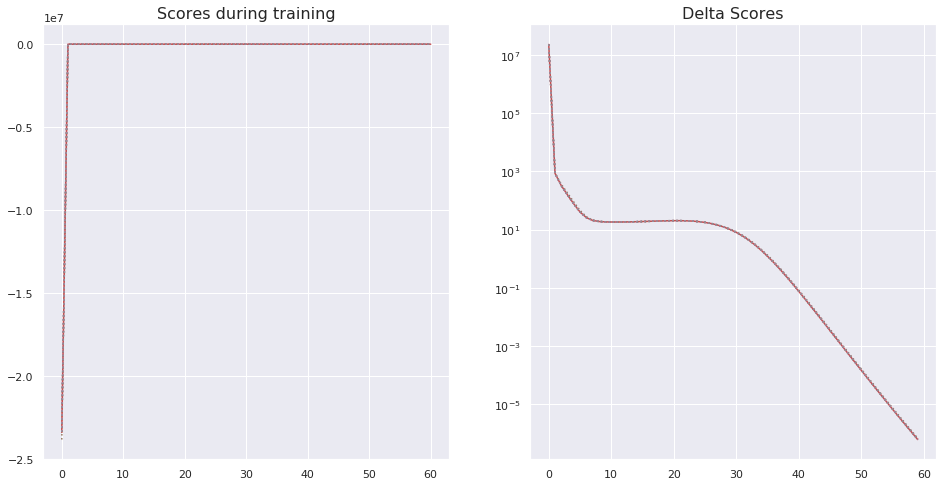

In [21]:
_ = plots.multiple_learning_plot(model.explored_free_energies_, legend=False)

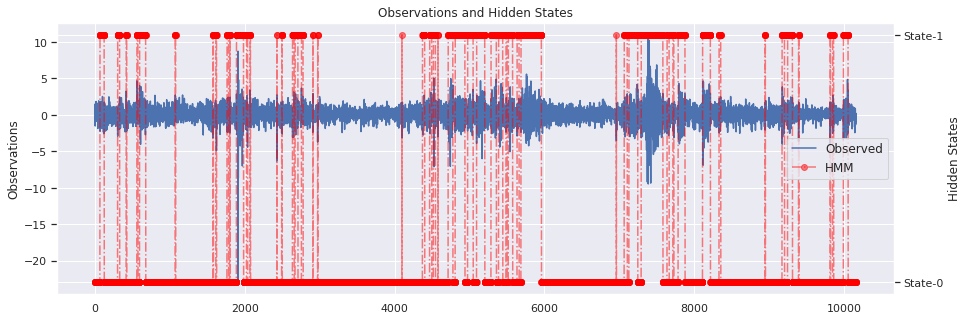

In [22]:
fig = plots.plot_hmm_states(logs, states[0])

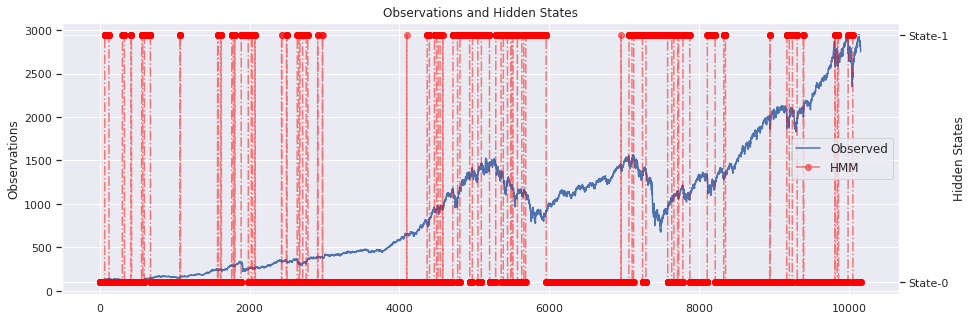

In [23]:
fig = plots.plot_hmm_states(sandp.closing[1:], states[0])

In [47]:
model10 = GaussianVariationalHMM.GaussianVariationalHMM(
    n_components=6,
    n_iterations=5000,
    n_inits=8, 
    tol=1e-15
)

In [48]:
model10.fit(logs2d)

GaussianVariationalHMM(A_prior=None, implementation='scaling',
            means_prior='uninformed', min_a_value=None, n_components=6,
            n_inits=8, n_iterations=5000, n_jobs=-1, pi_prior=None,
            random_state=None, tol=1e-15, variances_prior='uninformed',
            verbose=0)

In [49]:
states10 = model10.transform(logs2d)

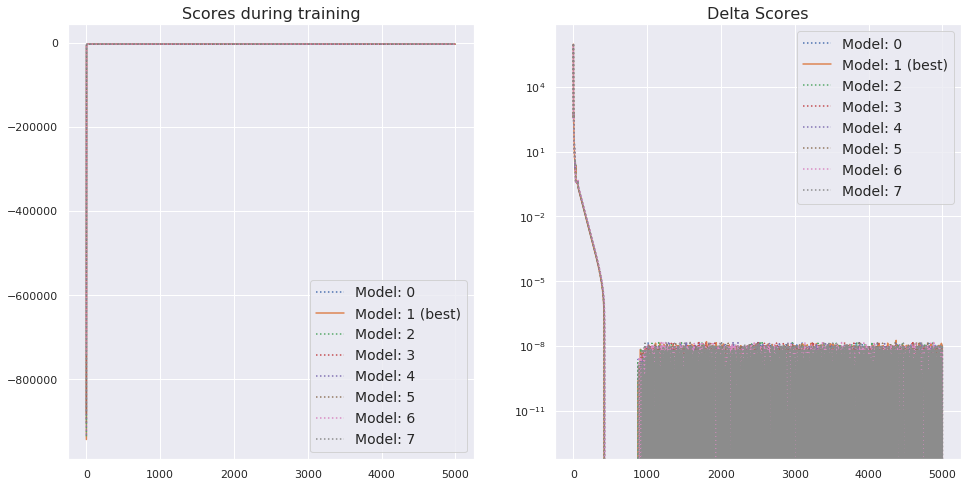

In [56]:
_ = plots.multiple_learning_plot(model10.explored_free_energies_)

In [57]:
len(model10.lower_bound_)

5000

In [58]:
pd.DataFrame(model10.A_counts_)

0           1            2         3            4         5
0   587.998642    0.168938     0.168977  0.166667  1479.363090  0.166667
1     0.168445    0.168781    46.408903  0.166667   127.546208  0.166667
2     0.168607    0.168208  1337.434112  0.166667    46.402955  0.166667
3     0.166667    0.166667     0.166667  0.166667     0.166667  0.166667
4  1479.363955  173.850994     0.168387  0.166667  4880.117462  0.166667
5     0.166667    0.166667     0.166667  0.166667     0.166667  0.166667

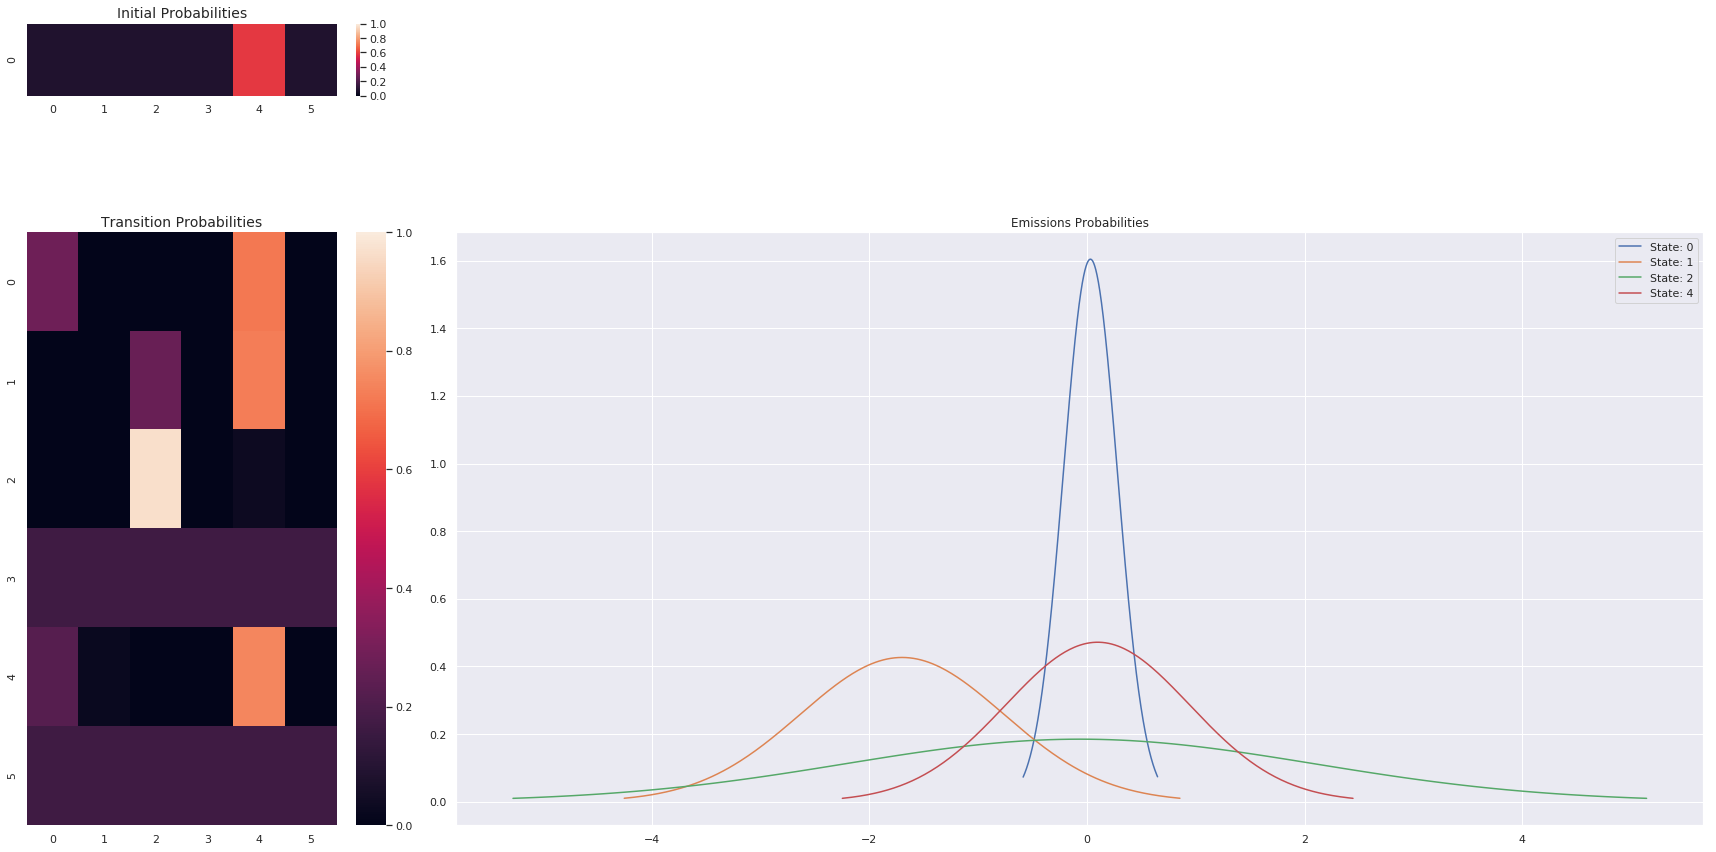

In [59]:
_ = plots.gaussian_hinton_diagram(
model10.pi_normalized_,
model10.A_normalized_,
model10.means_posterior_,
model10.variances_posterior_,
vmin=0,
vmax=1)

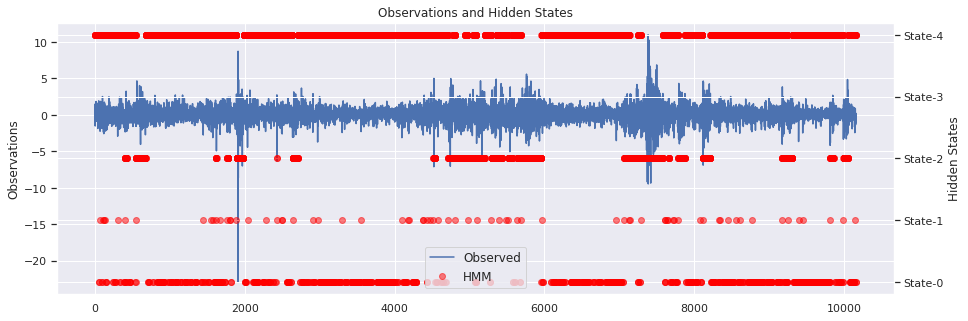

In [54]:
fig = plots.plot_hmm_states(logs, states10[0], states_lines=False)

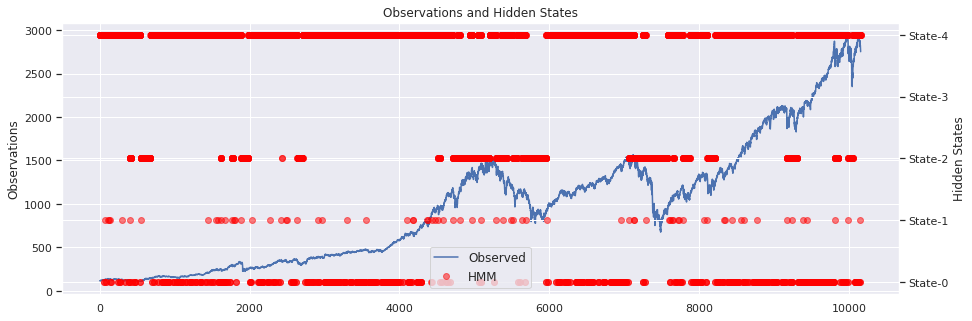

In [55]:
fig = plots.plot_hmm_states(sandp.closing[1:], states10[0], states_lines=False)